In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

np.random.seed(42)

In [2]:
df = pd.read_csv('./GSE150150_raw_counts.csv')

In [3]:
sampleDf = df

# X is shape of np.array([[1, 2], [2, 3], [1, 3], [10, 1], [9, 3], [11, 3]])
# Getting gene counts across all samples
X = sampleDf.iloc[:,1:].values
X = np.transpose(X)

In [6]:
tsne = TSNE(n_components=2, random_state=0, learning_rate='auto', init='pca')
X_tsne = tsne.fit_transform(X)

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


# DBScan

code modified from: https://www.reneshbedre.com/blog/dbscan-python.html

In [7]:
print(X_tsne.shape)

(5376, 2)


In [8]:
X_tsne_df = pd.DataFrame(X_tsne, columns = ['t-SNE-1', 't-SNE-2'])
X_tsne_df

,t-SNE-1,t-SNE-2
0,-5836.036621,11110.166016
1,-2719.650635,4522.655273
2,-5591.530273,10582.592773
3,-3096.133301,5393.329102
4,-6902.272461,13295.074219
...,...,...
5371,-2167.736572,3656.808838
5372,-11151.647461,21437.435547
5373,-1667.754639,2706.948975
5374,-2125.596924,3727.114502


In [9]:
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 5).fit(X_tsne_df)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(X_tsne_df)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

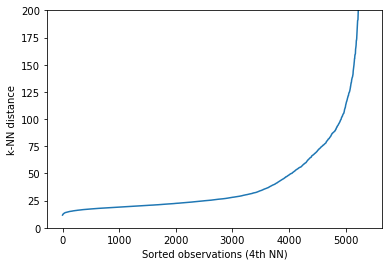

In [10]:
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.ylim([0, 200])
plt.show()

In [11]:
clusters = DBSCAN(eps = 35, min_samples = 4).fit(X_tsne_df)
# get cluster labels
set(clusters.labels_)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69}

In [12]:
from collections import Counter
Counter(clusters.labels_)

Counter({-1: 1350,
         0: 11,
         14: 6,
         7: 4,
         6: 9,
         1: 8,
         2: 5,
         3: 6,
         4: 9,
         5: 6,
         8: 4,
         12: 4,
         10: 4,
         11: 5,
         9: 6,
         13: 4,
         58: 5,
         15: 3449,
         16: 48,
         18: 5,
         17: 4,
         19: 7,
         20: 4,
         48: 4,
         44: 34,
         21: 25,
         32: 28,
         49: 4,
         24: 15,
         22: 7,
         23: 9,
         25: 5,
         26: 6,
         28: 4,
         27: 5,
         37: 15,
         34: 16,
         29: 4,
         42: 7,
         30: 4,
         31: 11,
         33: 14,
         35: 10,
         36: 6,
         40: 4,
         38: 5,
         39: 4,
         41: 6,
         45: 4,
         43: 9,
         47: 7,
         46: 6,
         68: 5,
         50: 37,
         51: 10,
         52: 3,
         53: 5,
         54: 9,
         69: 6,
         55: 5,
         62: 5,
         56: 4,

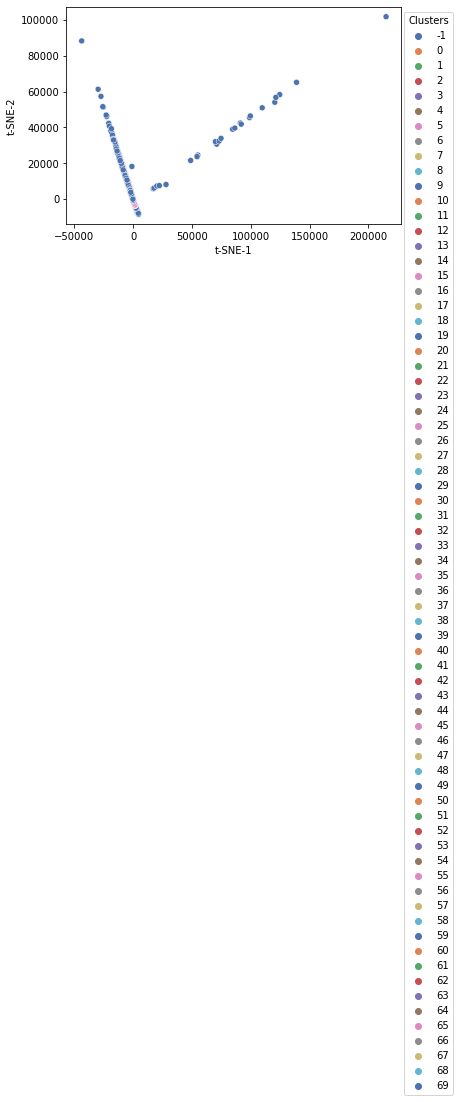

In [13]:
p = sns.scatterplot(data = X_tsne_df, x = "t-SNE-1", y = "t-SNE-2", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()